# DS490 Final Project
## Predicting Absenteeism

At PVCSD one of the intitiives has been to STRIVE FOR 5 or fewer days absent. This is because students with too many days absent are considered chronically absent, which is considered a critical status. PVCSD is also working on developing a Spartan Ready designation for students who are post secondary ready. If predicting Absenteeism is possible, this would serve as a warning, trigger for student driven intervention. 


1. Can we predict the number of days a student will be absent?
    - Use Linear Algebra?
1. Can we use last years test scores to preidct if a student will be chronically absenet?
    - Logistic Regression
1. How can we identify key metrics that indicate if a student will be chronically absent?
    - Decision Tree

## The Data

The data for this project is drawn from the PVCSD Student Information System (SIS). This means that the data and factors used and discovered in this project, will be computeable within the main system for student administration. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import cluster


data = pd.read_csv('data.csv', header=0)

data

,grade,gpa,chronicly_absent,days_absent,act_taken,read_scale,writing_scale,math_scale,female,white,special_ed,plan_504,free_and_reduced,gifted
0,10,3.054,1,30.01,0,530,480,502,1,1,1,0,0,0
1,11,3.357,0,11.63,1,603,691,656,1,1,0,0,0,0
2,10,2.801,0,9.43,0,567,578,552,1,1,0,0,0,0
3,9,3.614,0,3.98,0,557,553,552,0,1,1,0,0,0
4,11,2.939,0,0.77,1,549,576,578,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,9,2.727,1,9.55,0,518,569,552,1,1,0,0,0,0
1062,10,2.733,0,2.94,0,488,585,502,1,0,0,0,0,0
1063,11,3.754,0,2.37,0,705,677,800,0,1,0,0,0,0
1064,10,1.218,1,3.75,0,488,442,523,0,1,0,0,0,0


## EDA and Visualization

Before doing any prediction or clustering, it's important to look at the data and spot any potential issues. 

In [2]:
data.describe()

,grade,gpa,chronicly_absent,days_absent,act_taken,read_scale,writing_scale,math_scale,female,white,special_ed,plan_504,free_and_reduced,gifted
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,9.942777,3.288175,0.051595,6.154662,0.372420,606.855535,604.679174,620.504690,0.484991,0.857411,0.049719,0.047842,0.110694,0.087242
std,0.835542,0.581020,0.221311,6.216365,0.483676,57.832328,59.807911,67.852315,0.500009,0.349817,0.217465,0.213533,0.313900,0.282322
min,8.000000,0.991000,0.000000,0.000000,0.000000,417.000000,0.000000,446.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,2.944250,0.000000,1.900000,0.000000,568.000000,571.000000,571.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,3.420500,0.000000,4.460000,0.000000,605.000000,609.000000,616.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,3.744750,0.000000,8.532500,1.000000,636.000000,641.000000,664.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,4.000000,1.000000,54.940000,1.000000,800.000000,758.000000,800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Distribution of continous vairables

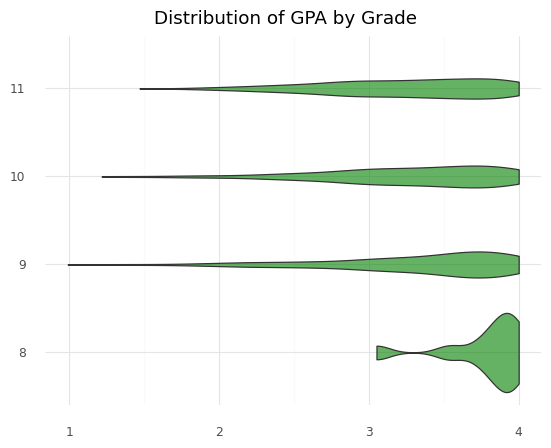

<ggplot: (-9223371908720696280)>

In [3]:

(ggplot(data, aes(y='gpa', x='factor(grade)'))
 + geom_violin(fill='Green', alpha =.6)
 #+ geom_jitter(fill='Green', alpha =.1)
 + theme_minimal()
 + theme(legend_position = "none")
 + labs(title ="Distribution of GPA by Grade",
       y="",x="" 
       )
 + coord_flip()

)


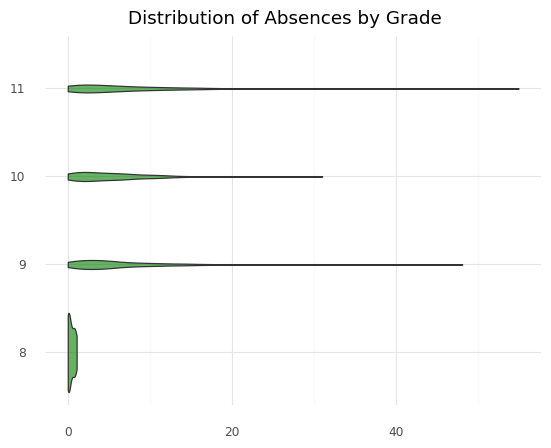

<ggplot: (-9223371908720669264)>

In [4]:

(ggplot(data, aes(y='days_absent', x='factor(grade)'))
 + geom_violin(fill='Green', alpha =.6)
 #+ geom_jitter(fill='Green', alpha =.1)
 + theme_minimal()
 + theme(legend_position = "none")
 + labs(title ="Distribution of Absences by Grade",
       y="",x="" 
       )
 + coord_flip()

)


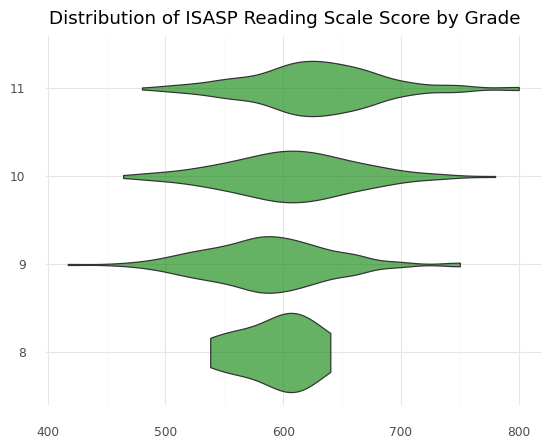

<ggplot: (-9223371908720400000)>

In [5]:

(ggplot(data, aes(y='read_scale', x='factor(grade)'))
 + geom_violin(fill='Green', alpha =.6)
 #+ geom_jitter(fill='Green', alpha =.1)
 + theme_minimal()
 + theme(legend_position = "none")
 + labs(title ="Distribution of ISASP Reading Scale Score by Grade",
       y="",x="" 
       )
 + coord_flip()

)


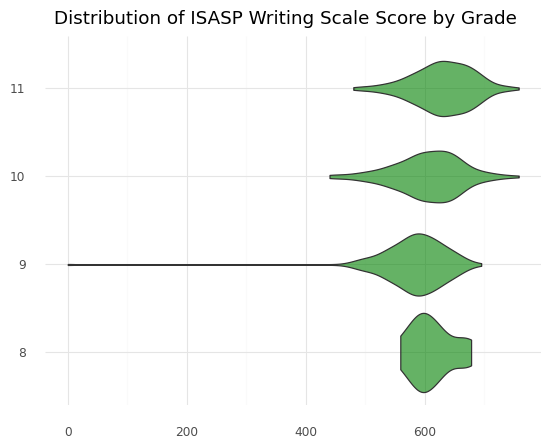

<ggplot: (-9223371908720361736)>

In [6]:

(ggplot(data, aes(y='writing_scale', x='factor(grade)'))
 + geom_violin(fill='Green', alpha =.6)
 #+ geom_jitter(fill='Green', alpha =.1)
 + theme_minimal()
 + theme(legend_position = "none")
 + labs(title ="Distribution of ISASP Writing Scale Score by Grade",
       y="",x="" 
       )
 + coord_flip()

)


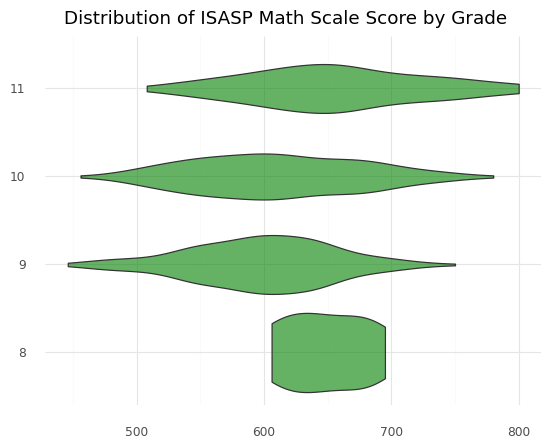

<ggplot: (-9223371908720372652)>

In [7]:

(ggplot(data, aes(y='math_scale', x='factor(grade)'))
 + geom_violin(fill='Green', alpha =.6)
 #+ geom_jitter(fill='Green', alpha =.1)
 + theme_minimal()
 + theme(legend_position = "none")
 + labs(title ="Distribution of ISASP Math Scale Score by Grade",
       y="",x="" 
       )
 + coord_flip()

)

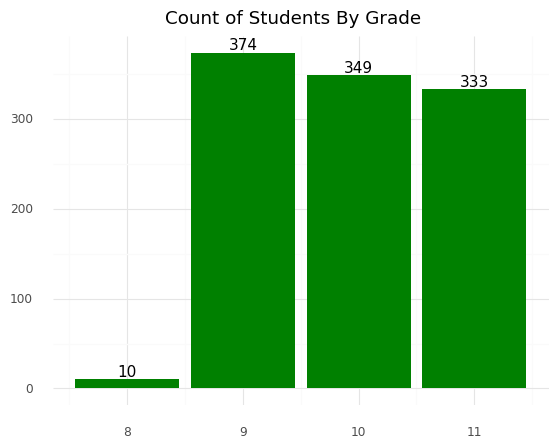

<ggplot: (-9223371908719286228)>

In [8]:

(ggplot(data, aes(x='grade'))
 + geom_bar( fill='Green')
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
 + theme_minimal()
 + theme(legend_position = "none")
 + labs(title ="Count of Students By Grade",
       y="",x="" 
       )

)


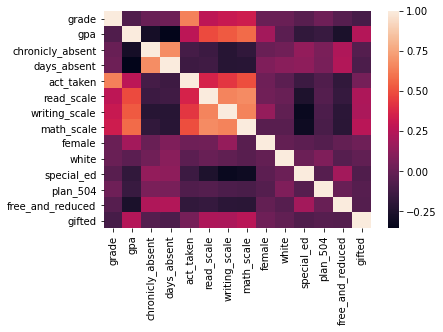

In [9]:
corr = data.corr()
corr

sns.heatmap(corr)


It's pretty clear that the ISASP scores are very correlated with themselves, with the corelation coefficent ranging from 0.65, to 0.68, which is fairly correlated. 

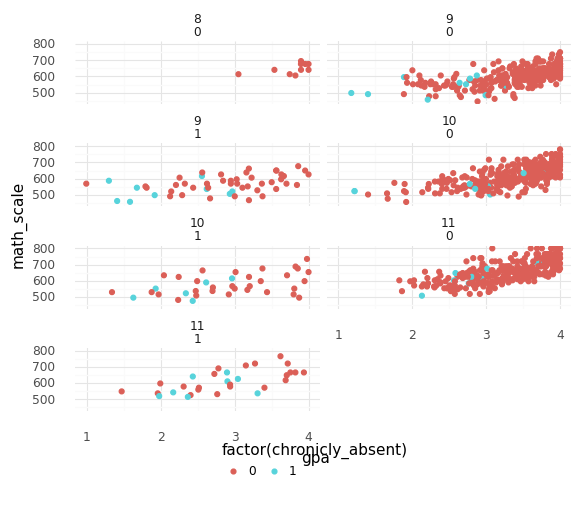

<ggplot: (-9223371908719162268)>

In [10]:

(ggplot(data, aes(y='math_scale', x='gpa', color='factor(chronicly_absent)'))
 + geom_point()
 + facet_wrap("~grade+free_and_reduced", ncol=2)
 + theme_minimal()
 + theme(legend_position = "bottom")
)


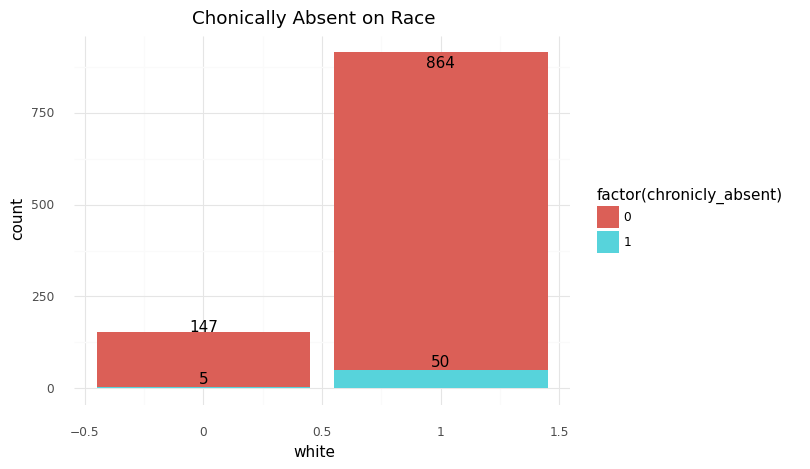

<ggplot: (-9223371908720382988)>

In [11]:
(ggplot(data, aes(x='white', fill='factor(chronicly_absent)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=1,
     va='bottom',
     position='dodge'
 )
 + theme_minimal()
 + theme(legend_position = "right")
 + labs( title ="Chonically Absent on Race")
)


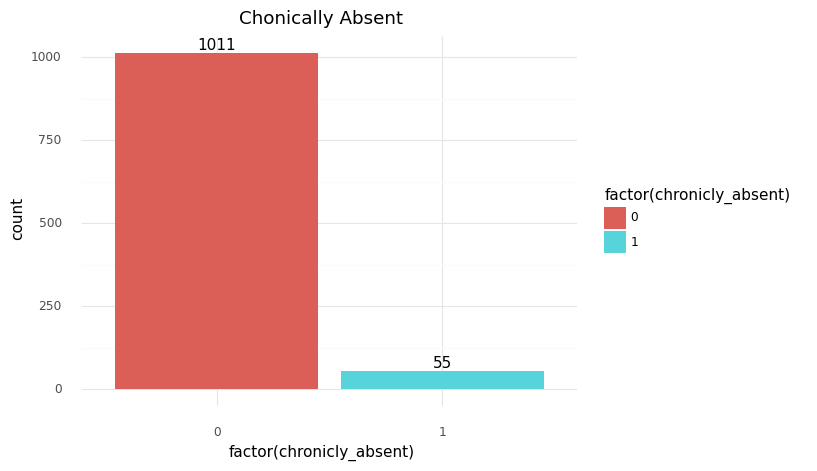

<ggplot: (-9223371908720412400)>

In [12]:
(ggplot(data, aes(x='factor(chronicly_absent)', fill='factor(chronicly_absent)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=1,
     va='bottom',
     position='dodge'
 )
 + theme_minimal()
 + theme(legend_position = "right")
 + labs( title ="Chonically Absent")
)

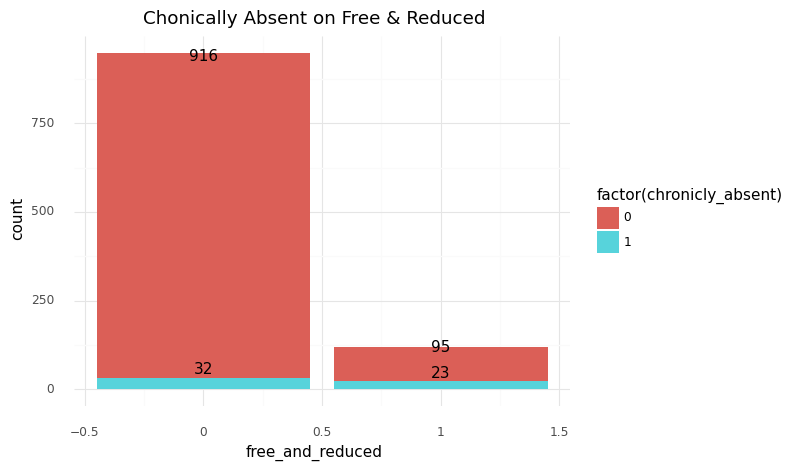

<ggplot: (-9223371908720714512)>

In [13]:
(ggplot(data, aes(x='free_and_reduced', fill='factor(chronicly_absent)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=1,
     va='bottom',
     position='dodge'
 )
 + theme_minimal()
 + theme(legend_position = "right")
 + labs( title ="Chonically Absent on Free & Reduced")
)

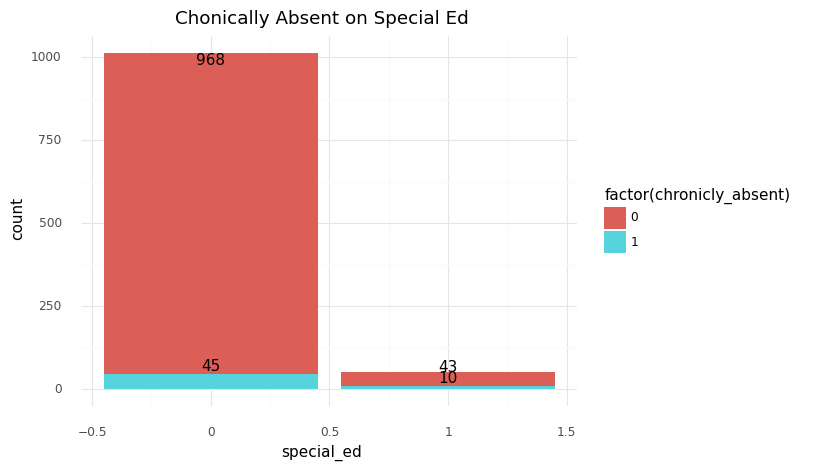

<ggplot: (-9223371908719039728)>

In [14]:
(ggplot(data, aes(x='special_ed', fill='factor(chronicly_absent)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=1,
     va='bottom',
     position='dodge'
 )
 + theme_minimal()
 + theme(legend_position = "right")
 + labs( title ="Chonically Absent on Special Ed")
)

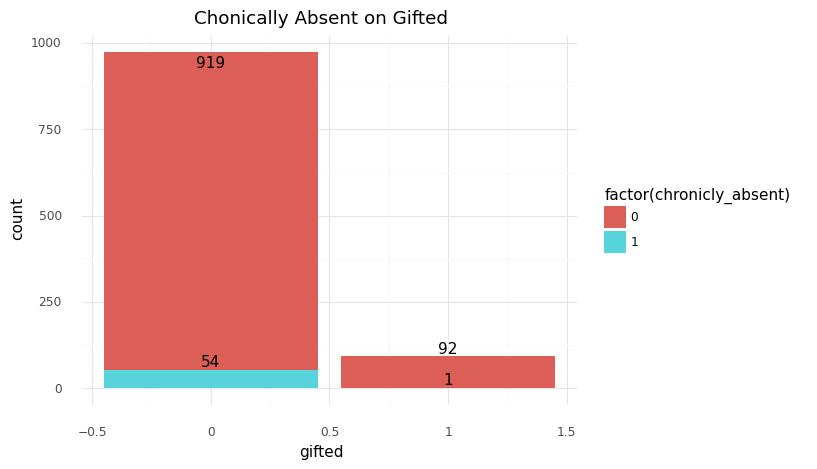

<ggplot: (-9223371908718917500)>

In [15]:
(ggplot(data, aes(x='gifted', fill='factor(chronicly_absent)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=1,
     va='bottom',
     position='dodge'
 )
 + theme_minimal()
 + theme(legend_position = "right")
 + labs( title ="Chonically Absent on Gifted")
)

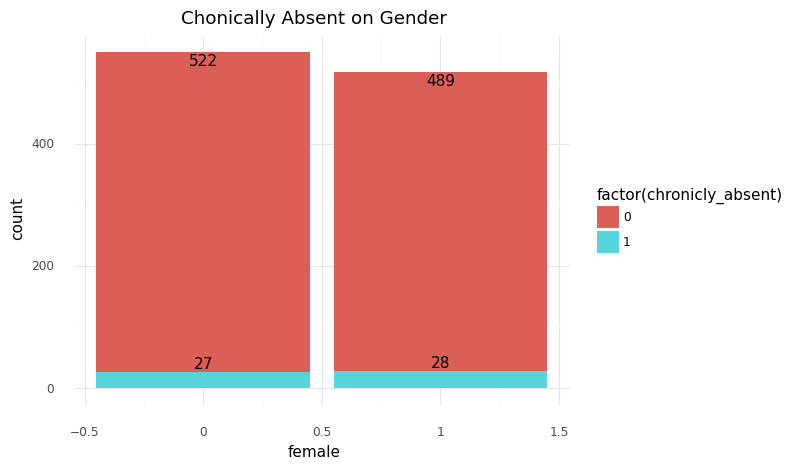

<ggplot: (-9223371908720384396)>

In [16]:
(ggplot(data, aes(x='female', fill='factor(chronicly_absent)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=1,
     va='bottom',
     position='dodge'
 )
 + theme_minimal()
 + theme(legend_position = "right")
 + labs( title ="Chonically Absent on Gender", 
       subtitle = "1 is Female, 0 is Male")
)

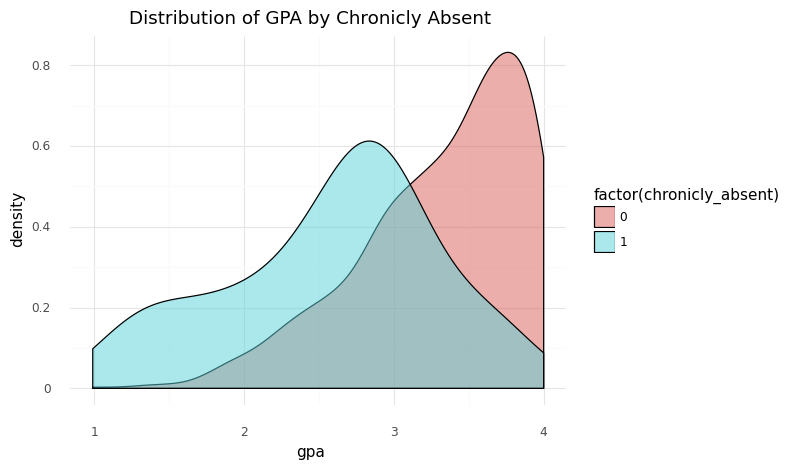

<ggplot: (-9223371908718841100)>

In [17]:
(ggplot(data, aes(x='gpa', fill='factor(chronicly_absent)'))
 + geom_density(alpha=.5)
 + theme_minimal()
 + theme(legend_position = "right")
 + labs( title ="Distribution of GPA by Chronicly Absent")
)

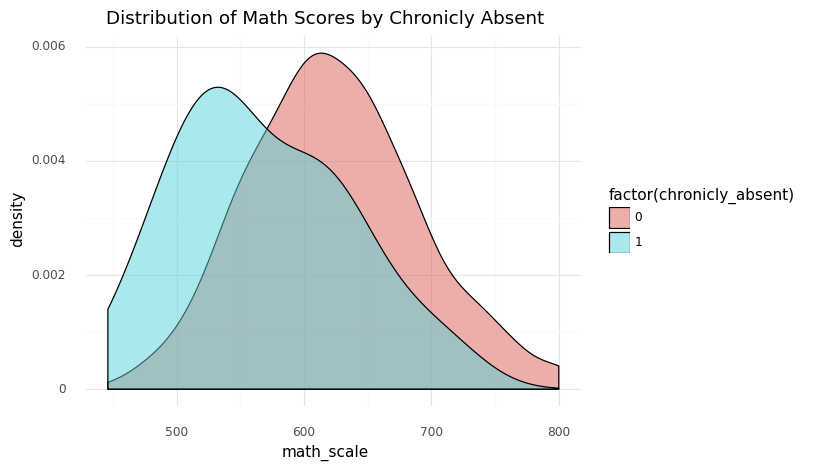

<ggplot: (-9223371908718876012)>

In [18]:
(ggplot(data, aes(x='math_scale', fill='factor(chronicly_absent)'))
 + geom_density(alpha=.5)
 + theme_minimal()
 + theme(legend_position = "right")
 + labs( title ="Distribution of Math Scores by Chronicly Absent")
)

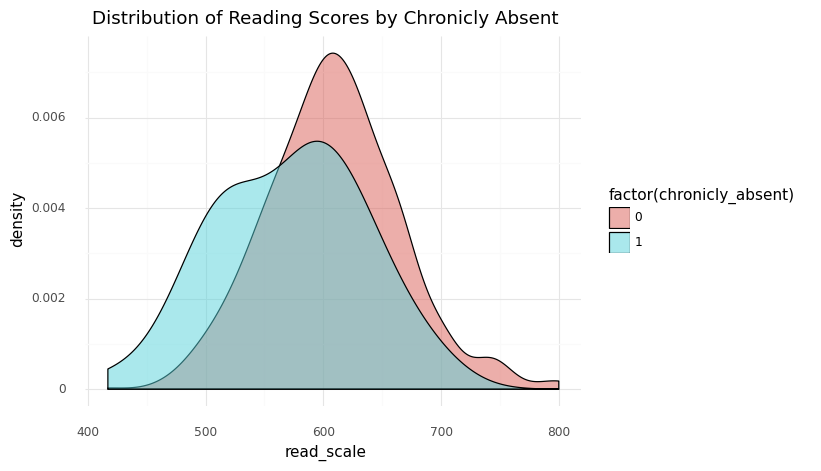

<ggplot: (-9223371908718571240)>

In [19]:
(ggplot(data, aes(x='read_scale', fill='factor(chronicly_absent)'))
 + geom_density(alpha=.5)
 + theme_minimal()
 + theme(legend_position = "right")
 + labs( title ="Distribution of Reading Scores by Chronicly Absent")
)

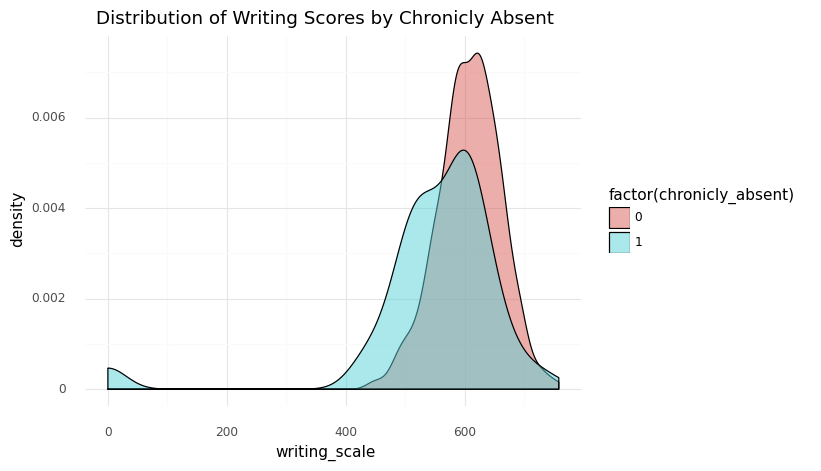

<ggplot: (-9223371908718896396)>

In [20]:
(ggplot(data, aes(x='writing_scale', fill='factor(chronicly_absent)'))
 + geom_density(alpha=.5)
 + theme_minimal()
 + theme(legend_position = "right")
 + labs( title ="Distribution of Writing Scores by Chronicly Absent")
)

In [64]:
#convert the dataframe in to array
y =(data['days_absent'])
X =(data[[ 'writing_scale', 'math_scale','grade','act_taken','female','free_and_reduced','white', 'special_ed', 'white']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

train_data = pd.concat([pd.DataFrame(y_train), pd.DataFrame(X_train)],axis=1, ignore_index=False)


## Linear Regression

In [65]:
train_data

,days_absent,writing_scale,math_scale,grade,act_taken,female,free_and_reduced,white,special_ed,white
345,4.90,625,711,9,0,0,0,0,0,0
313,0.00,613,688,10,1,0,0,1,0,1
242,0.24,545,626,9,0,0,0,0,0,0
500,2.18,666,596,9,0,0,0,1,0,1
170,1.68,601,616,9,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1033,6.36,625,561,9,0,1,0,1,0,1
763,4.83,601,638,9,0,0,0,1,0,1
835,4.45,599,634,10,0,0,1,1,0,1
559,1.58,641,626,9,0,1,0,1,0,1


In [66]:
train_data = pd.concat([pd.DataFrame(y_train), pd.DataFrame(X_train)],axis=1, ignore_index=False)

import statsmodels.formula.api as smf # for predictive model 1 - continuous dependent varible 
import statsmodels.api as sm

results = smf.ols('days_absent ~ writing_scale + math_scale+female+free_and_reduced+white', train_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            days_absent   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     26.84
Date:                Sun, 03 May 2020   Prob (F-statistic):           1.18e-24
Time:                        15:13:34   Log-Likelihood:                -2017.4
No. Observations:                 639   AIC:                             4047.
Df Residuals:                     633   BIC:                             4074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           17.9892      2.490      7.225      0.000      13.100      22.878
writing_scale       -0.0215      0.005     -4.582      0.000      -0.031      -0.012
math_scale          -0.0027      0.004     -0.632      0.528      -0.011       0.006
female               1.3876      0.467      2.972      0.003       0.471       2.305
free_and_reduced     5.5613      0.766      7.260      0.000       4.057       7.065
white[0]             0.9776      0.320      3.053      0.002       0.349       1.606
white[1]             0.9776      0.320      3.053      0.002       0.349       1.606
==============================================================================
Omnibus:                      231.952   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              931.532
Skew:                           1.648   Prob(JB):                    5.25e-203
Kurtosis:                       7.912   Cond. No.                     5.88e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## ANOVA

In [67]:
anova_table = sm.stats.anova_lm(results, typ=1) 
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
writing_scale,1.0,1915.813691,1915.813691,58.675958,6.994786e-14
math_scale,1.0,177.735699,177.735699,5.443542,1.995311e-02
female,1.0,305.012515,305.012515,9.341671,2.334345e-03
free_and_reduced,1.0,1679.070490,1679.070490,51.425183,2.083036e-12
white,2.0,324.110913,162.055457,4.963301,7.264281e-03
Residual,633.0,20667.920893,32.650744,NaN,NaN


In [68]:
t=range(y_test.size)
size = pd.DataFrame({'item':t})
size

,item
0,0
1,1
2,2
3,3
4,4
...,...
422,422
423,423
424,424
425,425


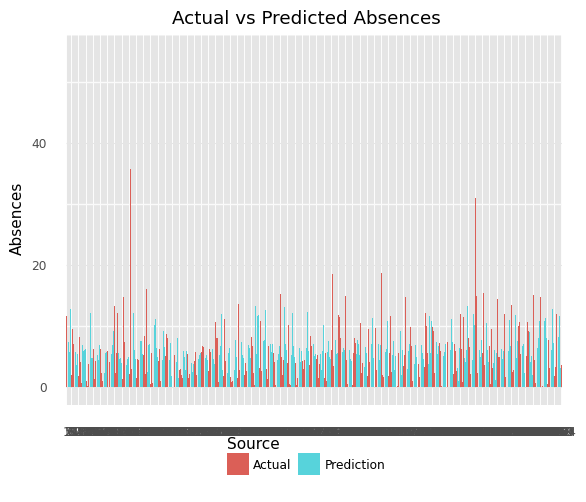

<ggplot: (-9223371908718635436)>

In [70]:
pred_vals = pd.DataFrame({ 'absences':results.predict(X_test), 'Source': "Prediction"}).reset_index()
pred_vals

act_vals = pd.DataFrame({'absences':y_test, 'Source': "Actual"}).reset_index()


combo= pd.concat([pred_vals, act_vals])




(ggplot(combo, aes(y='absences', x='factor(index)', fill='Source'))
 + geom_bar(stat='identity', position='dodge')
 + theme_minimal()
 + theme(legend_position = "bottom")
 + labs(title = "Actual vs Predicted Absences", 
       x="", y="Absences", )
)



## Preprocessing

In [71]:
y =(data['chronicly_absent'])
X =(data[[ 'writing_scale', 'math_scale','grade','act_taken','female','free_and_reduced','white', 'gifted','special_ed']])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

## Logistic Regression

In [72]:

logit_model = sm.Logit(y_train,X_train) #creating a model and passing the data
logit_fit = logit_model.fit() #fitting the model
logit_fit.summary() #displaying the result




Optimization terminated successfully.
         Current function value: 0.170384
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       chronicly_absent   No. Observations:                  639
Model:                          Logit   Df Residuals:                      630
Method:                           MLE   Df Model:                            8
Date:                Sun, 03 May 2020   Pseudo R-squ.:                  0.2296
Time:                        15:39:54   Log-Likelihood:                -108.88
converged:                       True   LL-Null:                       -141.32
Covariance Type:            nonrobust   LLR p-value:                 5.075e-11
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
writing_scale       -0.0080      0.003     -2.687      0.007      -0.014      -0.002
math_scale          -0.0065      0.004     -1.845      0.065      -0.013       0.000
grade                0.3949      0.189      2.095      0.036       0.025       0.764
act_taken           -0.2565      0.514     -0.499      0.618      -1.264       0.751
female               0.2929      0.380      0.770      0.441      -0.453       1.038
free_and_reduced     1.8986      0.405      4.683      0.000       1.104       2.693
white                1.3181      0.830      1.587      0.112      -0.309       2.945
gifted               0.1607      1.111      0.145      0.885      -2.016       2.337
special_ed           0.1507      0.521      0.290      0.772      -0.870       1.171
====================================================================================
"""

In [73]:
pred= logit_fit.predict(X_train)  #predict method of fitted model logit_res
pred2 = pred > 0.2
pred2 = pred2.astype(int)
pred2

pred_df = pd. DataFrame({"Prediction": pred2, "Actual":y_train})
pos_pred = pred_df["Prediction"] == 1
neg_pred = pred_df["Prediction"] == 0
pos_act = pred_df["Actual"] == 1
neg_act = pred_df["Actual"] == 0

true_pos = pred_df[pos_pred & pos_act]
true_neg = pred_df[neg_pred & neg_act]
false_pos = pred_df[pos_pred & neg_act]
false_neg = pred_df[neg_pred & pos_act]

print("True +:", len(true_pos.index), "  False +: ", len(false_pos.index), "\n" 
     "False -:", len(false_neg.index), " True -:", len(true_neg.index))

True +: 16   False +:  29 
False -: 21  True -: 573


In [30]:
pred= logit_fit.predict(X_test)  #predict method of fitted model logit_res
pred2 = pred > 0.2
pred2 = pred2.astype(int)
pred2

pred_df = pd. DataFrame({"Prediction": pred2, "Actual":y_test})
pos_pred = pred_df["Prediction"] == 1
neg_pred = pred_df["Prediction"] == 0
pos_act = pred_df["Actual"] == 1
neg_act = pred_df["Actual"] == 0

true_pos = pred_df[pos_pred & pos_act]
true_neg = pred_df[neg_pred & neg_act]
false_pos = pred_df[pos_pred & neg_act]
false_neg = pred_df[neg_pred & pos_act]

print("True +:", len(true_pos.index), "  False +: ", len(false_pos.index), "\n" 
     "False -:", len(false_neg.index), " True -:", len(true_neg.index))

True +: 18   False +:  409 
False -: 0  True -: 0


## Decision Tree

In [31]:
y =np.array(data['chronicly_absent'])
X =np.array(data[[ 'writing_scale', 'math_scale','grade','act_taken','female','free_and_reduced','white', 'gifted','special_ed']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [32]:
#calling the model and giving a name clf_model so as to use it again; 
#random state set the seed so that output is reproducible
clf_model = tree.DecisionTreeClassifier(random_state=0)
clf_model

clf_model.fit(X_train,y_train)
clf_model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

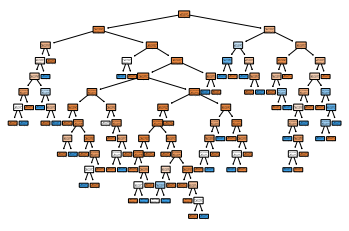

In [33]:

tree.plot_tree(clf_model,  filled=True, rounded= True)
plt.show()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

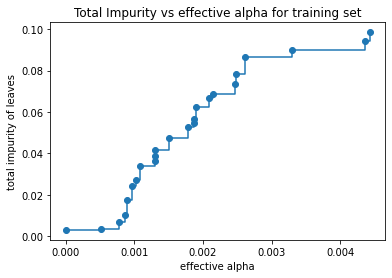

In [34]:

path = clf_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")




Number of nodes in the last tree is: 1 with ccp_alpha: 0.010631293725973212


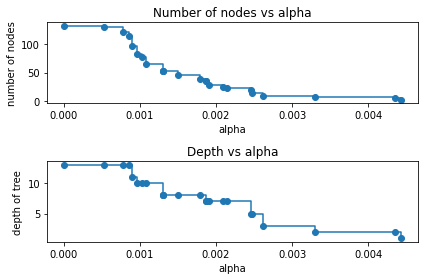

In [35]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [36]:
final_tree = clfs[-5]
pred = final_tree.predict(X_train)



pred_df = pd. DataFrame({"Prediction": pred, "Actual":y_train})
pos_pred = pred_df["Prediction"] == 1
neg_pred = pred_df["Prediction"] == 0
pos_act = pred_df["Actual"] == 1
neg_act = pred_df["Actual"] == 0

true_pos = pred_df[pos_pred & pos_act]
true_neg = pred_df[neg_pred & neg_act]
false_pos = pred_df[pos_pred & neg_act]
false_neg = pred_df[neg_pred & pos_act]

print("True +:", len(true_pos.index), "  False +: ", len(false_pos.index), "\n" 
     "False -:", len(false_neg.index), " True -:", len(true_neg.index))

True +: 12   False +:  7 
False -: 25  True -: 595


In [37]:
pred = clf_model.predict(X_test)



pred_df = pd. DataFrame({"Prediction": pred, "Actual":y_test})
pos_pred = pred_df["Prediction"] == 1
neg_pred = pred_df["Prediction"] == 0
pos_act = pred_df["Actual"] == 1
neg_act = pred_df["Actual"] == 0

true_pos = pred_df[pos_pred & pos_act]
true_neg = pred_df[neg_pred & neg_act]
false_pos = pred_df[pos_pred & neg_act]
false_neg = pred_df[neg_pred & pos_act]

print("True +:", len(true_pos.index), "  False +: ", len(false_pos.index), "\n" 
     "False -:", len(false_neg.index), " True -:", len(true_neg.index))

True +: 2   False +:  25 
False -: 16  True -: 384


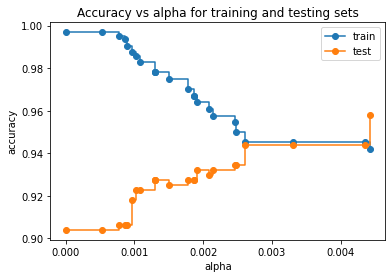

In [38]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

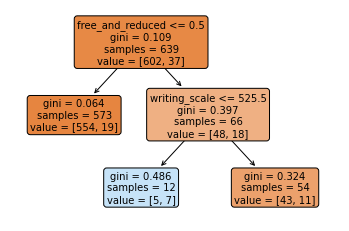

In [39]:
X =(data[[ 'writing_scale', 'math_scale','grade','act_taken','female','free_and_reduced','white', 'gifted','special_ed', 'white']])
tree.plot_tree(clfs[-2],  filled=True, rounded= True, feature_names=X.columns)
plt.show()

In [40]:
final_tree = clfs[-2]
pred = final_tree.predict(X_train)



pred_df = pd. DataFrame({"Prediction": pred, "Actual":y_train})
pos_pred = pred_df["Prediction"] == 1
neg_pred = pred_df["Prediction"] == 0
pos_act = pred_df["Actual"] == 1
neg_act = pred_df["Actual"] == 0

true_pos = pred_df[pos_pred & pos_act]
true_neg = pred_df[neg_pred & neg_act]
false_pos = pred_df[pos_pred & neg_act]
false_neg = pred_df[neg_pred & pos_act]

print("True +:", len(true_pos.index), "  False +: ", len(false_pos.index), "\n" 
     "False -:", len(false_neg.index), " True -:", len(true_neg.index))

True +: 7   False +:  5 
False -: 30  True -: 597


In [41]:

pred = final_tree.predict(X_test)



pred_df = pd. DataFrame({"Prediction": pred, "Actual":y_test})
pos_pred = pred_df["Prediction"] == 1
neg_pred = pred_df["Prediction"] == 0
pos_act = pred_df["Actual"] == 1
neg_act = pred_df["Actual"] == 0

true_pos = pred_df[pos_pred & pos_act]
true_neg = pred_df[neg_pred & neg_act]
false_pos = pred_df[pos_pred & neg_act]
false_neg = pred_df[neg_pred & pos_act]

print("True +:", len(true_pos.index), "  False +: ", len(false_pos.index), "\n" 
     "False -:", len(false_neg.index), " True -:", len(true_neg.index))

True +: 2   False +:  8 
False -: 16  True -: 401


## Clustering

In [42]:
cluster_data = data[['gpa','read_scale', 'writing_scale', 'chronicly_absent', 'math_scale','grade','act_taken','female','free_and_reduced','white', 'gifted','special_ed']]

cluster_data

plotting_data = data[['gpa','read_scale', 'writing_scale']]

In [43]:
kmeans_model = cluster.KMeans(n_clusters=3, random_state=42) 

# calling the model object and using the attribute fit to fit the model by passing the data/features/characterstics
kmeans_model.fit(cluster_data) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [44]:
cluster_labels = pd.DataFrame(kmeans_model.labels_.astype(int), columns = ['Clusters'])
cluster_labels

,Clusters
0,0
1,1
2,0
3,0
4,0
...,...
1061,0
1062,0
1063,1
1064,0


In [45]:
scatter_data = plotting_data.join(cluster_labels) 
scatter_data.head()

,gpa,read_scale,writing_scale,Clusters
0,3.054,530,480,0
1,3.357,603,691,1
2,2.801,567,578,0
3,3.614,557,553,0
4,2.939,549,576,0


In [46]:
scatter_data['Clusters'].unique() #will tell how many clusters are there 

array([0, 1, 2], dtype=int64)

In [47]:
scatter_data['Clusters'].value_counts() #will tell how many clusters are there 

2    520
1    296
0    250
Name: Clusters, dtype: int64

[3.054 3.357 2.801 ... 3.754 1.218 1.218]


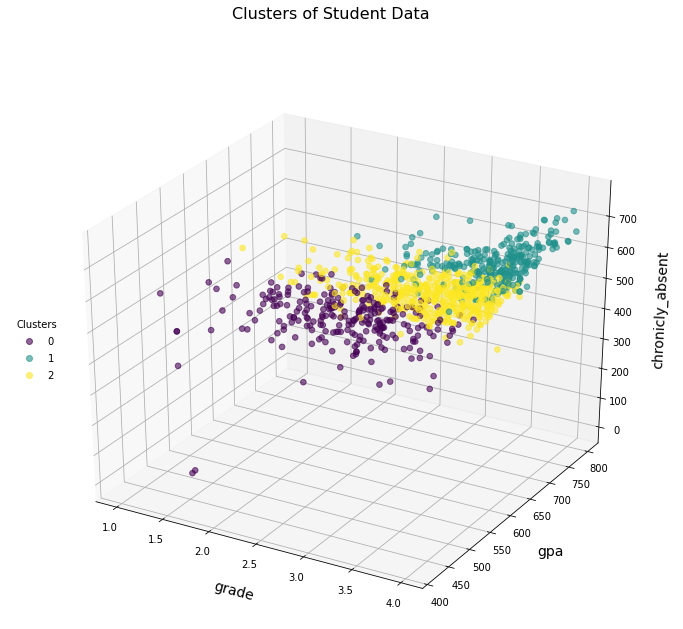

In [48]:
# 3D Scatter plots with legend 
from mpl_toolkits.mplot3d import Axes3D

plt.close('all') #sanity statement for closing all existing plots 
fig, ax3 = plt.subplots(figsize=(12, 10), subplot_kw = {'projection': '3d'})

# giving title to the figure using the method suptitle for Figure object fig
fig.suptitle("Clusters of Student Data", fontsize=16) 

#extracting the columns and converting into arrays for no hassles in processing later
x = np.array(scatter_data.loc[:, 'gpa'])
y = np.array(scatter_data.loc[:, 'read_scale'])
z = np.array(scatter_data.loc[:, 'writing_scale'])
cluster_color_code = np.array(scatter_data.loc[:, "Clusters"])
#cluster_color_code = np.array(cluster_data.loc[:, "chronicly_absent"])

print(x)
# Create only one scatter plot object and save it as scatter_plot. 
# Argument c: pass the array which will be categorical and categories denoted by numbers. These will be used to color code. 
# Argument cmap: I am adding color choice by argument cmap. Recall we used it in Seaborn too in Week 12
# You can find a list of color maps here - https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html
# Argument s: allows us to control for the size of dot/point. 
# Argument alpha: controls the opacity

scatter_plot = ax3.scatter(x, y, z, c=cluster_color_code,  s=10**1.5, alpha =0.6)

# Creating the legend. Calling the method legend of the Axes object
# Argument 1 - legend element of the scatter plot object that we saved 
# use * before the name of the method as in - *scatter_plot.legend_elements() to unpack the values returned by the 
# legend_elements() method and not the object. If you remove * you will instead of legend there are some object information 
# printed across the graph
# Argument 2: location of legend 
# Argument 3: title of the legend
# You can read more about the legend here - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.legend.html

ax3.legend(*scatter_plot.legend_elements(), loc="center left",
              title="Clusters", frameon=False)

# Managing the aesthetics
ax3.set_xlabel(data.columns[0], fontsize=14)
ax3.set_ylabel(data.columns[1], fontsize=14)
ax3.set_zlabel(data.columns[2], fontsize=14)
ax3.xaxis.labelpad = 15
ax3.yaxis.labelpad = 15
ax3.zaxis.labelpad = 15

plt.show()

In [49]:
scatter_data.loc[:, "Clusters"]

0       0
1       1
2       0
3       0
4       0
       ..
1061    0
1062    0
1063    1
1064    0
1065    0
Name: Clusters, Length: 1066, dtype: int32